In [1]:
# Session 5: Assignment 1
# Task 1:
# Read the dataset from the below link
# https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_
# Names/US_Baby_Names_right.csv
# Questions:
# 1. Delete unnamed columns
# 2. Show the distribution of male and female
# 3. Show the top 5 most preferred names
# 4. What is the median name occurence in the dataset
# 5. Distribution of male and female born count by states

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import sqlite3 as db

from pandasql import sqldf

import os
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv"

df = pd.read_csv(url)
draft1 = pd.read_csv(url) # Supply the file name (path)
draft1.info()

print(draft1.head(16)) # Check the first 6 rows
#draft1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 42.6+ MB
    Unnamed: 0     Id       Name  Year Gender State  Count
0        11349  11350       Emma  2004      F    AK     62
1        11350  11351    Madison  2004      F    AK     48
2        11351  11352     Hannah  2004      F    AK     46
3        11352  11353      Grace  2004      F    AK     44
4        11353  11354      Emily  2004      F    AK     41
5        11354  11355    Abigail  2004      F    AK     37
6        11355  11356     Olivia  2004      F    AK     33
7        11356  11357   Isabella  2004      F    AK     30
8        11357  11358     Alyssa  2004      

In [2]:
# Question-1 #
# 1. Delete unnamed columns
del draft1["Unnamed: 0"] # Remove the column 'Unnamed: 0'
draft1.head(6) # Check the first 6 rows

# deletes Unnamed: 0
del draft1['Id']

print(draft1.head())

categorical = draft1.dtypes[draft1.dtypes == "object"].index
print(categorical)

      Name  Year Gender State  Count
0     Emma  2004      F    AK     62
1  Madison  2004      F    AK     48
2   Hannah  2004      F    AK     46
3    Grace  2004      F    AK     44
4    Emily  2004      F    AK     41
Index(['Name', 'Gender', 'State'], dtype='object')


F    558846
M    457549
Name: Gender, dtype: int64


(0.0, 2.0)

<Figure size 1224x720 with 0 Axes>

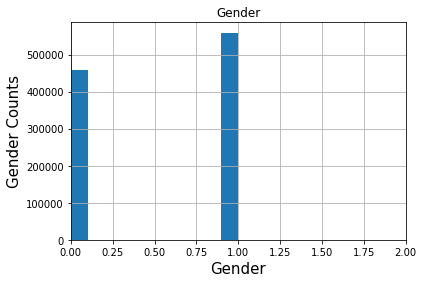

In [3]:
# Question-2 #
# 2. Show the distribution of male and female
print(draft1['Gender'].value_counts())
draft1.head(6)

cleanup_nums = {"Gender":{"M": 0, "F": 1}}
draft1.replace(cleanup_nums, inplace=True)
draft1.head(6)

fig1=plt.figure(figsize=(17,10))
draft1.hist(column="Gender")
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Gender Counts",fontsize=15)
plt.xlim([0.0,2.0])

In [4]:
# Question-3 #
# 3. Show the top 5 most preferred names
# print(draft1['Name'].value_counts().head(5))

# I don't want to sum the Year column, so I am deleting it. I only want to get sum over the
# column 'Count'
del draft1["Year"]

# Grouping the data by 'Name'
names = draft1.groupby("Name").sum()

# print the first 5 observations
print(names.head())

# print the size of the dataset
print(names.shape)

# Sorting it from the biggest value to the smallest one over the column 'Count'
top_5_preferred_names = names.sort_values("Count", ascending = 0).head(5)
print(top_5_preferred_names)

# Now, the dataset names is already grouped by the column "Name", 
# So, all the names are unique already in this dataset names. 
# Now, finding the length of this dataset names
len(names)
# Finding the name with most occurrences
names[names.Count == names.Count.max()]
# Finding the no. of different names having the least occurrences
len(names[names.Count == names.Count.min()])

         Gender  Count
Name                  
Aaban         0     12
Aadan         0     23
Aadarsh       0      5
Aaden         0   3426
Aadhav        0      6
(17632, 2)
          Gender   Count
Name                    
Jacob          7  242874
Emma         561  214852
Michael       17  214405
Ethan          6  209277
Isabella     561  204798


2578

In [5]:
# Question-4 #
# 4. What is the median name occurence in the dataset
print(names[names.Count == names.Count.median()])
# Finding the standard deviations of names
print("Standard Deviation of names: ",names.Count.std())
print("Summary: ",names.describe())

            Gender  Count
Name                     
Aishani          7     49
Alara            8     49
Alysse           8     49
Ameir            0     49
Anely            8     49
Antonina         9     49
Aveline          6     49
Aziah            6     49
Baily            8     49
Caleah           9     49
Carlota          7     49
Cristine         7     49
Dahlila          7     49
Darvin           0     49
Deante           0     49
Deserae          9     49
Devean           0     49
Elizah           8     49
Emmaly           8     49
Emmanuela        9     49
Envy             8     49
Esli             8     49
Fay              8     49
Gurshaan         0     49
Hareem           7     49
Iven             0     49
Jaice            0     49
Jaiyana          7     49
Jamiracle        9     49
Jelissa          8     49
...            ...    ...
Kyndle           8     49
Kynsley          7     49
Leylanie         8     49
Maisha           7     49
Malillany        7     49
Mariann     

State  Gender
AK     M          2587
       F          2404
AL     F          9878
       M          8419
AR     F          7171
       M          6475
AZ     F         14518
       M         10820
CA     F         45144
       M         31637
CO     F         11424
       M          9183
CT     F          6575
       M          5733
DC     F          3053
       M          3000
DE     F          2549
       M          2440
FL     F         25781
       M         20070
GA     F         19385
       M         15454
HI     M          3546
       F          3255
IA     F          7131
       M          6307
ID     F          4918
       M          4833
IL     F         21268
       M         16828
                 ...  
OK     F          9519
       M          8138
OR     F          8604
       M          7333
PA     F         17480
       M         14171
RI     F          2558
       M          2468
SC     F          9465
       M          8195
SD     M          2908
       F          28

Text(0.5,1,'Female born count')

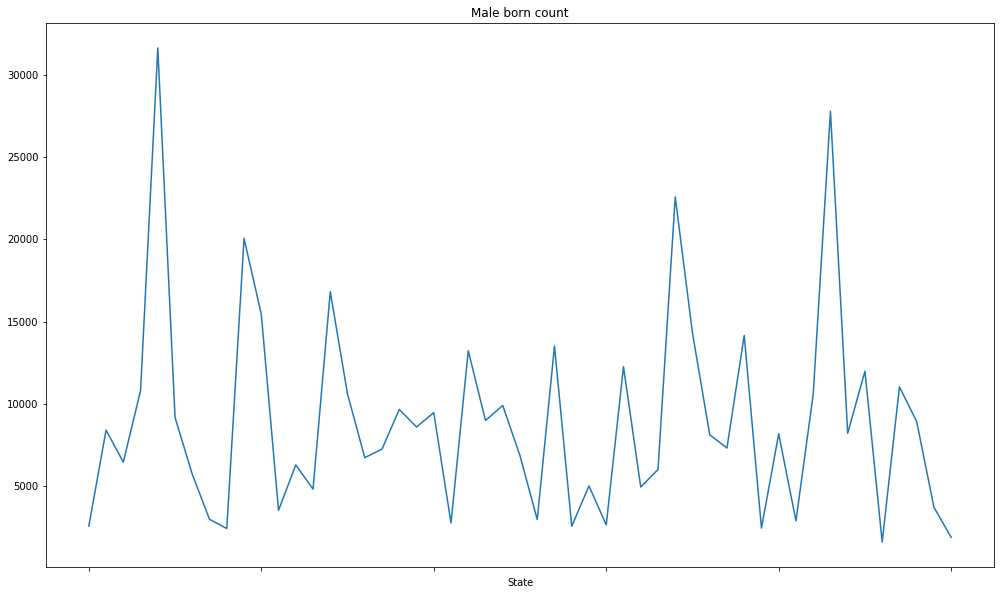

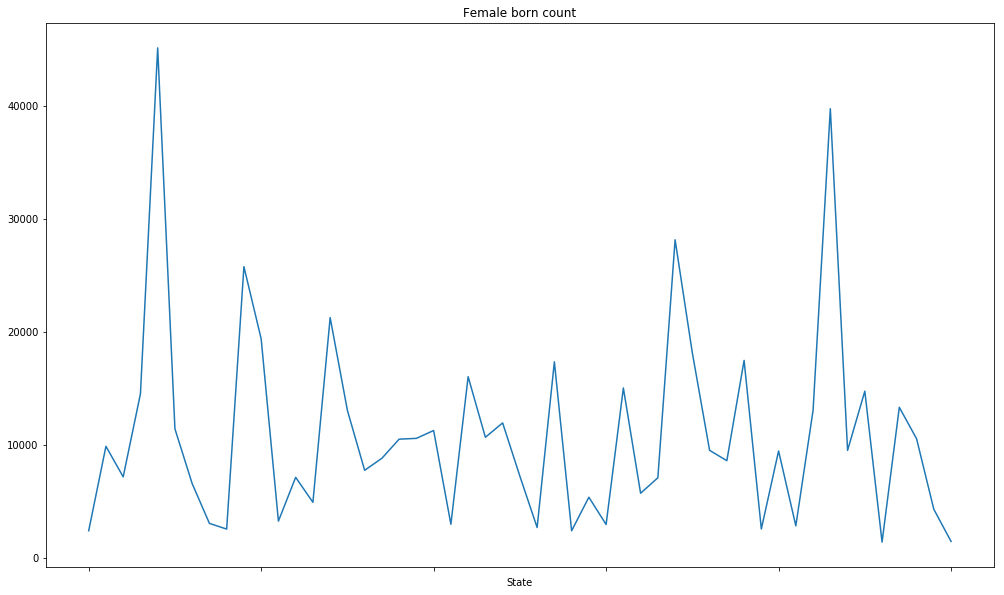

In [6]:
# Question-5 #
# 5. Distribution of male and female born count by states
temp1 = df.groupby('State')
print(temp1.Gender.value_counts())
print(temp1.Count.sum())

fig2=plt.figure(figsize=(17,10))
df[df['Gender']=='M'].groupby(by='State').count()['Count'].plot()
plt.title('Male born count')

fig3=plt.figure(figsize=(17,10))
df[df['Gender']=='F'].groupby(by='State').count()['Count'].plot()
plt.title('Female born count')

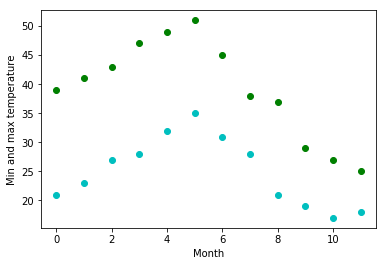

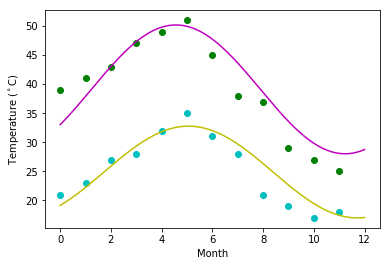

In [7]:
# Task 2:
# We have the min and max temperatures in a city In India for each months of the year. We
# would like to find a function to describe this and show it graphically, the dataset given below.
# Task:
# 1. fitting it to the periodic function
# 2. plot the fit
# Data
# Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
# Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
%matplotlib inline
months = np.arange(12)
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

# Fitting the above results plot to a periodic function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

# Plotting the best fit curve
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()